In [1]:
import os
import warnings

# Visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl

# NumPy settings
np.set_printoptions(precision=4)

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Polars settings
pl.Config.set_fmt_str_lengths(1_000)
pl.Config.set_tbl_cols(n=1_000)
pl.Config.set_tbl_rows(n=200)

warnings.filterwarnings("ignore")

# Black code formatter (Optional)
%load_ext lab_black

# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "white": "#FFFFFF",  # Bright white
        "info": "#00FF00",  # Bright green
        "warning": "#FFD700",  # Bright gold
        "error": "#FF1493",  # Deep pink
        "success": "#00FFFF",  # Cyan
        "highlight": "#FF4500",  # Orange-red
    }
)
console = Console(theme=custom_theme)


def go_up_from_current_directory(*, go_up: int = 1) -> None:
    """This is used to up a number of directories.

    Params:
    -------
    go_up: int, default=1
        This indicates the number of times to go back up from the current directory.

    Returns:
    --------
    None
    """
    import sys

    CONST: str = "../"
    NUM: str = CONST * go_up

    # Goto the previous directory
    prev_directory = os.path.join(os.path.dirname(__name__), NUM)
    # Get the 'absolute path' of the previous directory
    abs_path_prev_directory = os.path.abspath(prev_directory)

    # Add the path to the System paths
    sys.path.insert(0, abs_path_prev_directory)
    print(abs_path_prev_directory)

In [3]:
fp: str = "../../data/bike_sharing.csv"

df: pl.DataFrame = pl.read_csv(fp)
print(f"Shape: {df.shape}")

df.head(3)

Shape: (17379, 13)


season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
str,i64,i64,i64,bool,i64,bool,str,f64,f64,f64,f64,i64
"""spring""",0,1,0,false,6,false,"""clear""",9.84,14.395,0.81,0.0,16
"""spring""",0,1,1,false,6,false,"""clear""",9.02,13.635,0.8,0.0,40
"""spring""",0,1,2,false,6,false,"""clear""",9.02,13.635,0.8,0.0,32


### Visualization

- Visualize the average bike rental demand per hour during the week.

In [ ]:
grpby_df = (
    df.group_by(["weekday", "hour"])
    .agg(pl.col("count").mean().round(2).alias("count"))
    .with_columns(((pl.col("weekday").cast(pl.Int64) * 24) + pl.col("hour").cast(pl.Int64)).alias("time_of_week"))
    .sort("time_of_week")
)
grpby_df.head(20)

weekday,hour,count,time_of_week
i64,i64,f64,i64
0,0,93.99,0
0,1,77.43,1
0,2,61.63,2
0,3,31.14,3
0,4,9.36,4
0,5,8.69,5
0,6,14.5,6
0,7,33.1,7
0,8,83.86,8


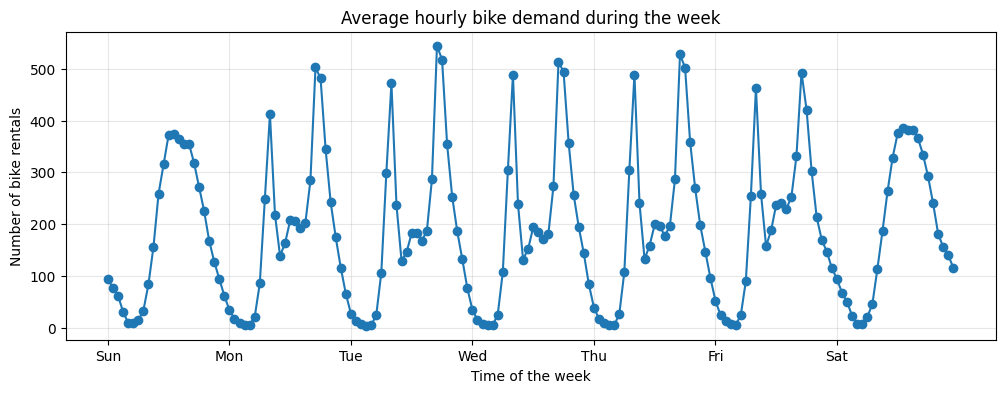

In [11]:
# Extract NumPy arrays from Polars Series (no pandas conversion)
x = grpby_df["time_of_week"].to_numpy()
y = grpby_df["count"].to_numpy()

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, marker="o", linestyle="-", color="#1f77b4")
ax.set_title("Average hourly bike demand during the week")
ax.set_xticks([i * 24 for i in range(7)])
ax.set_xticklabels(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
ax.set_xlabel("Time of the week")
ax.set_ylabel("Number of bike rentals")
ax.grid(alpha=0.3)

In [42]:
# If the time information was only present as a date or datetime column, we could have expanded it into hour-in-the-day,
# day-in-the-week, day-in-the-month, month-in-the-year
X = df.drop("count").with_columns(pl.int_range(0, df.height).alias("id"))
y = df["count"]
X.head(3)

season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,id
str,i64,i64,i64,bool,i64,bool,str,f64,f64,f64,f64,i64
"""spring""",0,1,0,false,6,false,"""clear""",9.84,14.395,0.81,0.0,0
"""spring""",0,1,1,false,6,false,"""clear""",9.02,13.635,0.8,0.0,1
"""spring""",0,1,2,false,6,false,"""clear""",9.02,13.635,0.8,0.0,2


In [ ]:
import polars.selectors as cs

cat_cols: list[str] = X.select(cs.string()).columns
for var in cat_cols:
    count = X[var].value_counts(normalize=True).with_columns((pl.col("proportion") * 100).round(2).alias("percentage"))
    console.print(count, style="info")

shape: (4, 3)
┌────────┬────────────┬────────────┐
│ season ┆ proportion ┆ percentage │
│ ---    ┆ ---        ┆ ---        │
│ str    ┆ f64        ┆ f64        │
╞════════╪════════════╪════════════╡
│ winter ┆ 0.243512   ┆ 24.35      │
│ fall   ┆ 0.258703   ┆ 25.87      │
│ summer ┆ 0.253697   ┆ 25.37      │
│ spring ┆ 0.244088   ┆ 24.41      │
└────────┴────────────┴────────────┘

shape: (4, 3)
┌────────────┬────────────┬────────────┐
│ weather    ┆ proportion ┆ percentage │
│ ---        ┆ ---        ┆ ---        │
│ str        ┆ f64        ┆ f64        │
╞════════════╪════════════╪════════════╡
│ misty      ┆ 0.261465   ┆ 26.15      │
│ rain       ┆ 0.08165    ┆ 8.17       │
│ clear      ┆ 0.656712   ┆ 65.67      │
│ heavy_rain ┆ 0.000173   ┆ 0.02       │
└────────────┴────────────┴────────────┘

In [ ]:
# Replace "heavy_rain" with "rain" in the "weather" column
X = X.with_columns(
    pl.when(pl.col("weather").eq("heavy_rain")).then(pl.lit("rain")).otherwise(pl.col("weather")).alias("weather")
)

for var in cat_cols:
    count = X[var].value_counts(normalize=True).with_columns((pl.col("proportion") * 100).round(2).alias("percentage"))
    console.print(count, style="info")

shape: (4, 3)
┌────────┬────────────┬────────────┐
│ season ┆ proportion ┆ percentage │
│ ---    ┆ ---        ┆ ---        │
│ str    ┆ f64        ┆ f64        │
╞════════╪════════════╪════════════╡
│ winter ┆ 0.243512   ┆ 24.35      │
│ fall   ┆ 0.258703   ┆ 25.87      │
│ summer ┆ 0.253697   ┆ 25.37      │
│ spring ┆ 0.244088   ┆ 24.41      │
└────────┴────────────┴────────────┘

shape: (3, 3)
┌─────────┬────────────┬────────────┐
│ weather ┆ proportion ┆ percentage │
│ ---     ┆ ---        ┆ ---        │
│ str     ┆ f64        ┆ f64        │
╞═════════╪════════════╪════════════╡
│ rain    ┆ 0.081823   ┆ 8.18       │
│ misty   ┆ 0.261465   ┆ 26.15      │
│ clear   ┆ 0.656712   ┆ 65.67      │
└─────────┴────────────┴────────────┘

### Time Based Cross Validation

In [45]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=48,
    max_train_size=10000,
    test_size=1000,
)

all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]

train_0.shape, test_0.shape

((10000,), (1000,))

In [46]:
train_0

array([ 2331,  2332,  2333, ..., 12328, 12329, 12330], shape=(10000,))

In [47]:
X.filter(pl.col("id").is_in(train_0)).head()

season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,id
str,i64,i64,i64,bool,i64,bool,str,f64,f64,f64,f64,i64
"""summer""",0,4,1,false,2,true,"""misty""",25.42,31.06,0.5,6.0032,2331
"""summer""",0,4,2,false,2,true,"""misty""",24.6,31.06,0.53,8.9981,2332
"""summer""",0,4,3,false,2,true,"""misty""",23.78,27.275,0.56,8.9981,2333
"""summer""",0,4,4,false,2,true,"""misty""",22.96,26.515,0.64,8.9981,2334
"""summer""",0,4,5,false,2,true,"""misty""",22.14,25.76,0.68,8.9981,2335


In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for var in cat_cols:
    X = X.with_columns(var, pl.Series(le.fit_transform(X[var])).alias(f"{var}_enc"))
X = X.drop(cat_cols)

In [52]:
X.head()

year,month,hour,holiday,weekday,workingday,temp,feel_temp,humidity,windspeed,id,season_enc,weather_enc
i64,i64,i64,bool,i64,bool,f64,f64,f64,f64,i64,i64,i64
0,1,0,false,6,false,9.84,14.395,0.81,0.0,0,1,0
0,1,1,false,6,false,9.02,13.635,0.8,0.0,1,1,0
0,1,2,false,6,false,9.02,13.635,0.8,0.0,2,1,0
0,1,3,false,6,false,9.84,14.395,0.75,0.0,3,1,0
0,1,4,false,6,false,9.84,14.395,0.75,0.0,4,1,0


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.drop("id").to_numpy(), y.to_numpy())

print(lr.coef_, lr.intercept_)

lr.score(X.drop("id").to_numpy(), y.to_numpy())

[  79.9545    2.2322    7.4485  -24.6992    1.8832    3.1302    5.9148
    2.5681 -194.0422    0.3792   20.7249   -5.0527] -51.702194741196394


0.39578168935675506

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
def evaluate(model, X, y, cv, model_prop=None, model_step=None):
    """Evaluate a sklearn model with cross-validation and optionally report a property
    from the fitted estimators (safe: won't raise if the attribute is missing).
    """
    # Prepare numpy arrays for sklearn
    X_np = X.drop("id").to_numpy()
    y_np = y.to_numpy()

    # Only return estimators if caller requested a model property
    return_estimators = model_prop is not None
    cv_results = cross_validate(
        model,
        X_np,
        y_np,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
        return_estimator=return_estimators,
    )

    # Safely extract model property if requested
    if model_prop is not None:
        found_values = []
        for est in cv_results.get("estimator", []):
            target = est
            # If a pipeline step/name was provided, attempt several safe lookups
            if model_step is not None:
                # Try dict-like access (Pipeline supports ['step'])
                try:
                    target = est[model_step]
                except Exception:
                    # Try named_steps attr (Pipeline)
                    try:
                        named = getattr(est, "named_steps", None)
                        if named is not None and model_step in named:
                            target = named[model_step]
                        else:
                            target = getattr(est, model_step, None)
                    except Exception:
                        target = getattr(est, model_step, None)
            # Finally, try to get the requested attribute without raising
            if target is None:
                continue
            val = getattr(target, model_prop, None)
            if val is not None:
                found_values.append(val)

        if len(found_values) == 0:
            print(
                f"Attribute '{model_prop}' not found on any returned estimators (or it is None)."
            )
        else:
            print(f"Mean model.{model_prop} = {np.mean(found_values)}")

    # Report CV scores
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


# Safe example call
evaluate(lr, X, y, cv=ts_cv, model_prop="n_iter_")

Attribute 'n_iter_' not found on any returned estimators (or it is None).
Mean Absolute Error:     138.418 +/- 15.460
Root Mean Squared Error: 179.524 +/- 19.996
